Wine Quality Data Set:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Predicting the Quality of Red Wines

By: Jaskaran Singh, Justin Wong, Matthew Gillies, Shehab Khan

# Introduction

For those who drink wine, knowing the quality of the wine is often very important to them. In our study, we look at four factors to predict whether the quality of wine out of 10. Our data set contains 1599 red wines with data on their acidity, composition, density, and quality. First, we will identify the 4 factors with the highest correlations to quality. To ensure that these factors do have a postive correlation with the quality of the wine, we will perform a hypothesis test and obtain a confidence interval regarding the correlatons. Using these factors we will predict the quality of the wines.

-2 parameters?
-frame question based on papers.

# Preliminary Results

In [1]:
library(cowplot)
library(digest)
library(gridExtra)
library(repr)
library(tidyverse)
library(infer)
library(tidymodels)
library(GGally)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.4 ──

✔ broom        0.7.11     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ modeldata    0.1.1      ✔ workflows    0.2.4 
✔ parsnip      0.1.7      ✔ workflowsets 0.1.0 
✔ recipes      0.1.17     ✔ yardstick    0.0.9 

── Conflicts ─────────────

In [70]:
wine_quality <- read_delim('winequality-red.csv', show_col_types = FALSE)
names(wine_quality) <- make.names(names(wine_quality), unique = TRUE)


head(wine_quality)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


### UNIVARIATE ANALYSIS

For this analysis, we took bootstrap samples for each of the variables individually to check which of them deem neccessary for our analysis. 

replicate,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.3,0.33,0.45,1.5,0.057,19,37,0.99498,3.18,0.89,11.1,7
1,7.9,0.51,0.25,2.9,0.077,21,45,0.99740,3.49,0.96,12.1,6
1,10.8,0.40,0.41,2.2,0.084,7,17,0.99840,3.08,0.67,9.3,6
1,7.4,0.55,0.19,1.8,0.082,15,34,0.99655,3.49,0.68,10.5,5
1,7.5,0.43,0.30,2.2,0.062,6,12,0.99495,3.44,0.72,11.5,7
1,8.4,0.62,0.12,1.8,0.072,38,46,0.99504,3.38,0.89,11.8,6


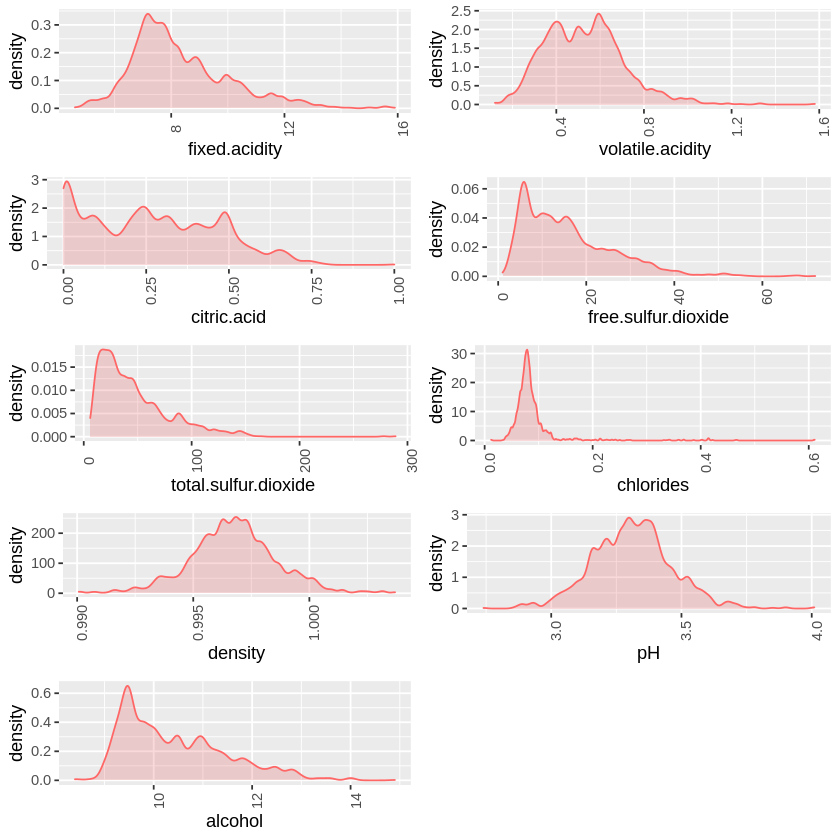

In [71]:
# We check first for wine_quality 
wine_quality_bootstrap <- wine_quality %>% 
    rep_sample_n(size = 40, reps = 2000, replace = TRUE)

wine_quality_hist_fixed <- wine_quality_bootstrap %>% 
    ggplot(aes(x = fixed.acidity)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.8) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666") 

wine_quality_hist_volatile <- wine_quality_bootstrap %>% 
    ggplot(aes(x = volatile.acidity)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.1) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_citric <- wine_quality_bootstrap %>% 
    ggplot(aes(x = citric.acid)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.04) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_sulfur <- wine_quality_bootstrap %>% 
    ggplot(aes(x = free.sulfur.dioxide)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.8) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_sulfur_total <- wine_quality_bootstrap %>% 
    ggplot(aes(x = total.sulfur.dioxide)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.8) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_chlorides <- wine_quality_bootstrap %>% 
    ggplot(aes(x = chlorides)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.8) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_density <- wine_quality_bootstrap %>% 
    ggplot(aes(x = density)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.02) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_ph <- wine_quality_bootstrap %>% 
    ggplot(aes(x = pH)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.04) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_sulphates <- wine_quality_bootstrap %>% 
    ggplot(aes(x = sulphates)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.8) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

wine_quality_hist_alcohol <- wine_quality_bootstrap %>% 
    ggplot(aes(x = alcohol)) + 
    #geom_histogram(aes(y = ..density.. ), colour = "#FF6666", fill = "white", binwidth = 0.07) + 
    geom_density(alpha=.2, fill="#e34444", colour = "#FF6666")

head(wine_quality_bootstrap)

all_plots_row <- plot_grid(wine_quality_hist_fixed + 
                           theme(axis.text.x = element_text(angle = 90)),

                           wine_quality_hist_volatile +  
                           theme(axis.text.x = element_text(angle = 90)), 
                        
                           wine_quality_hist_citric +
                           theme(axis.text.x = element_text(angle = 90)), 

                           wine_quality_hist_sulfur + 
                           theme(axis.text.x = element_text(angle = 90)),
                           
                           wine_quality_hist_sulfur_total + 
                           theme(axis.text.x = element_text(angle = 90)),
                           
                           wine_quality_hist_chlorides + 
                           theme(axis.text.x = element_text(angle = 90)),
                           
                           wine_quality_hist_density + 
                           theme(axis.text.x = element_text(angle = 90)),
                           
                           wine_quality_hist_ph + 
                           theme(axis.text.x = element_text(angle = 90)),
                           
                           wine_quality_hist_alcohol + 
                           theme(axis.text.x = element_text(angle = 90)),
                           ncol = 2)

means_grid <- plot_grid(all_plots_row, 
                        rel_heights = c(0.5, 1))
    
means_grid

Based on the univariate graphs, we can see that on taking bootstrap samples, fixed acidity and volatile acidity follow a somewhat normal distribution wherein the histogram for volatile acidity follows a somewhat bimodal distribution. 

It can be seen that pH and density follows an almost perfect normal distribution while total and free sulfur dioxide follow a right skewed distribution. This suggests that the variables fixed acidity, volatile acidity, pH, and density should be our ideal variables for our analysis to predict the quality of the wine. 



In [73]:
# Now we split data into a 75:25 training and testing data, which is then scaled and centered 
# to make sure all variables are comparable

wine_split <- initial_split(wine_quality, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

wine_recipe <- recipe(quality ~ . , data = wine_train) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

wine_scaled <- wine_recipe %>%
            prep() %>%
            bake(wine_train)


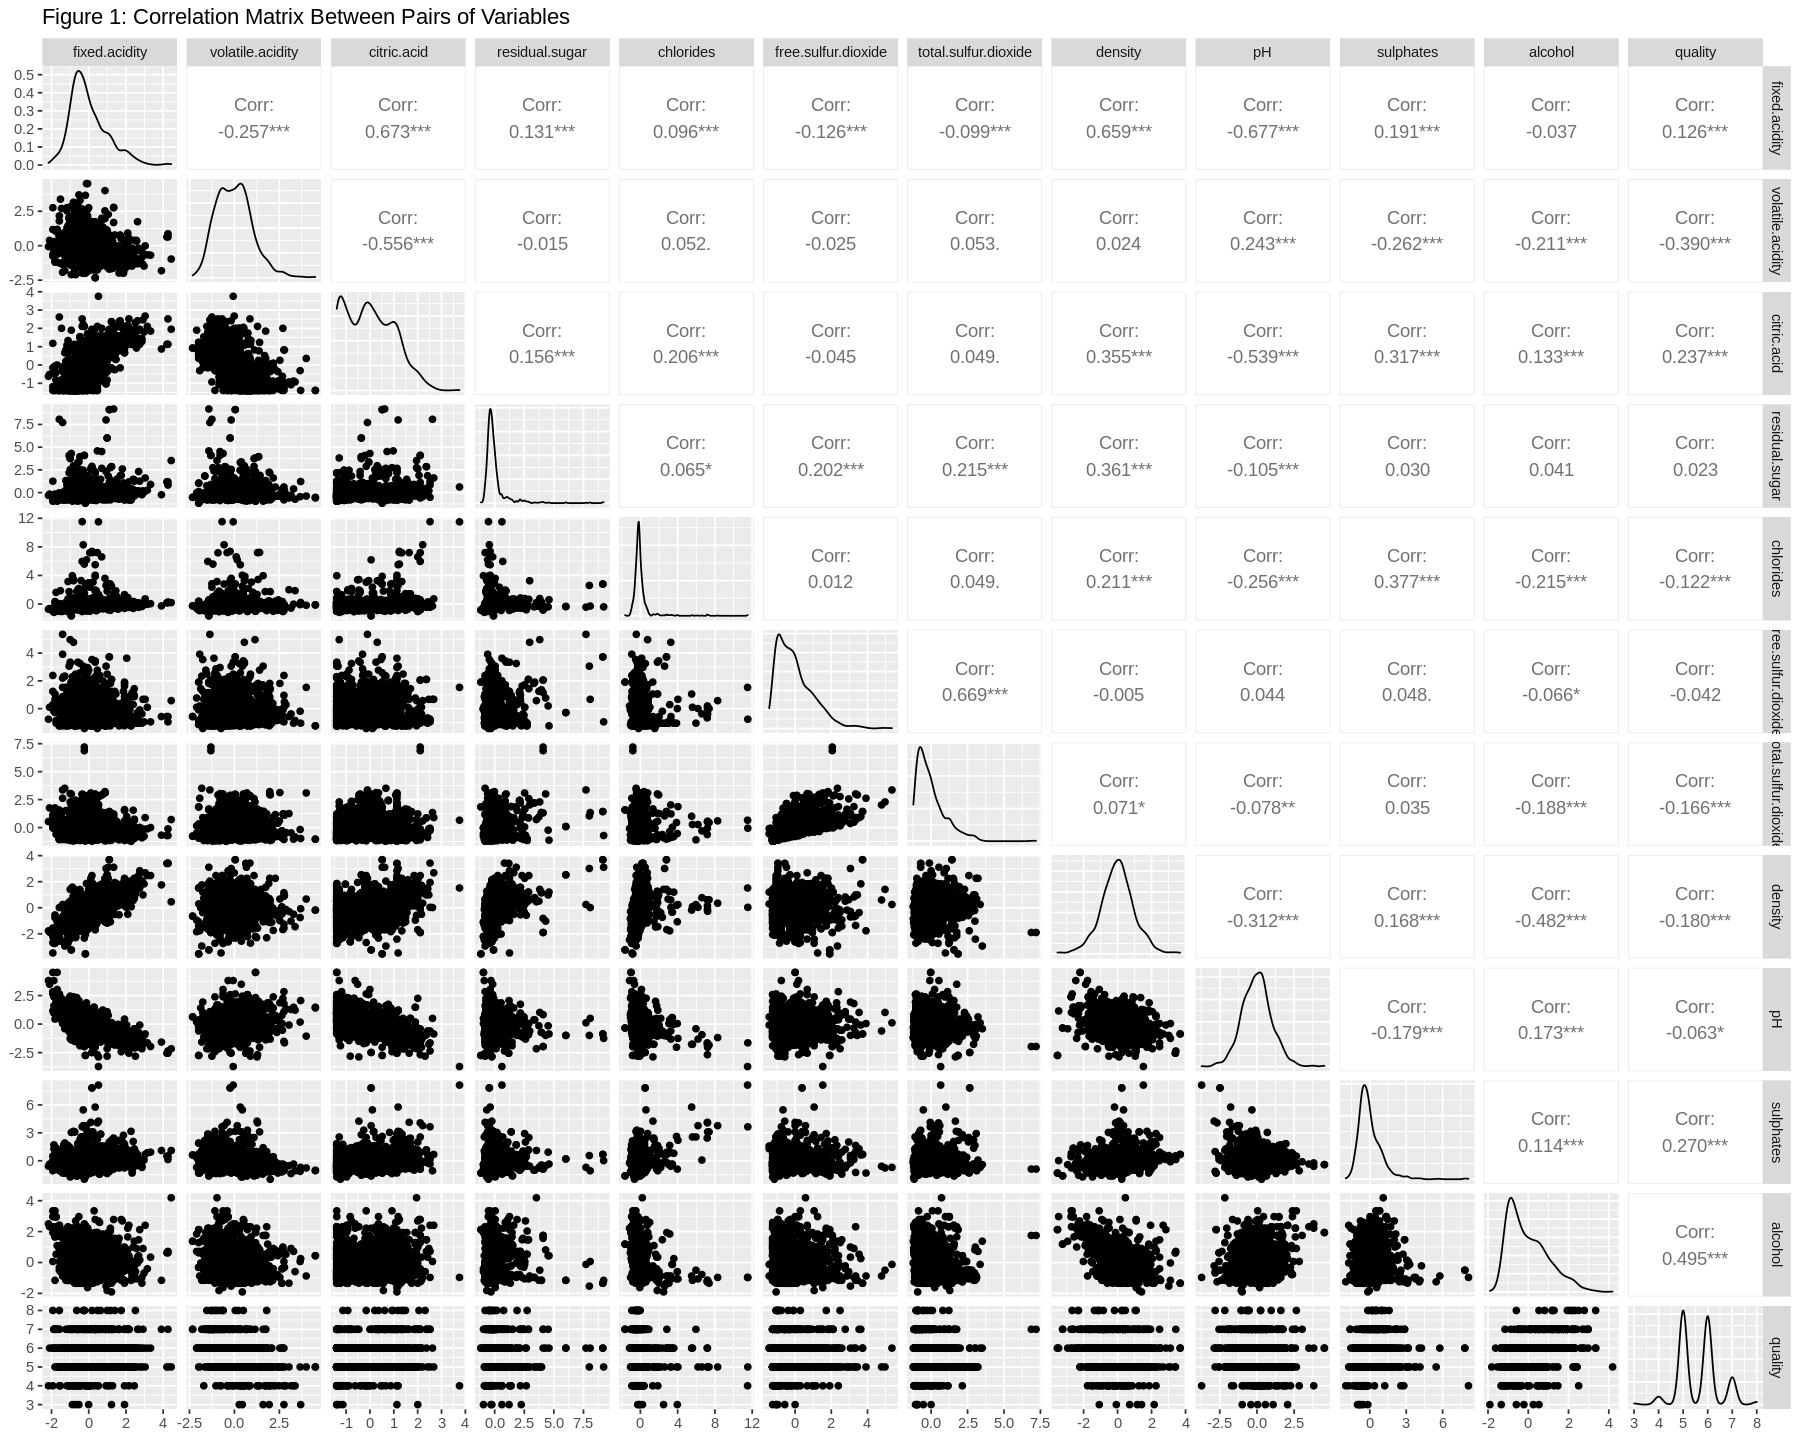

In [7]:
ggpairs(wine_scaled) + 
     ggtitle("Figure 1: Correlation Matrix Between Pairs of Variables")

# Methods and Results

# References
